# Chapter 2. 판다스(Pandas)
판다스는 그 자체로도 많은 유용한 클래스와 함수를 제공하지만 다른 패키지의 기능도 훌륭하게 활용하는 대단한 도구입니다. 데이터 분석, 특히 금융 분석에 있어 편리하고 효율적인 작업을 가능하게 하는 사용자 인터페이스를 제공합니다. 파이썬이 오늘날 이렇게 성장하는 데는 판다스의 역할이 컸다고 생각하는 개발자들이 있을 정도로 강력한 도구임에 분명합니다.  
본질적으로 판다스와 엑셀은 프로세스가 동일합니다. 하지만 판다스는 엑셀과 같은 그래픽 스프레드시트 앱과는 다른 사고방식이 필요합니다. 클릭이 아니라 명령어를 입력하여 데이터를 다뤄야 하기 때문에 모호한 부분 없이 의도를 분명히 해서 명령어를 입력해야 합니다. 그래도 한 번 익숙해지면 엑셀로 다룰 수 없을 정도로 거대한 데이터를 조작할 때 큰 능력과 유연성을 제공하며, 프로그래밍으로 절차를 자동화할 수도 있습니다.  
이 장의 목차는 다음과 같습니다.  
* DataFrame 클래스: `DataFrame` 클래스가 가지는 기본적인 특성과 기능, `NumPy ndarray` 객체를 `DataFrame` 객체로 변환하는 방법.
* 기본적인 분석과 기본적인 시각화
* Series 클래스: 열이 하나뿐인 `DataFrame`
* GroupBy 연산: 단일 혹은 복수 열을 기준으로 데이터를 그룹화
* 고급 선택법
* 병합(concatentate), 조인(join), 머지(merge): 여러 데이터를 붙여서 하나로 병합
* 성능 측면

## 2.1 DataFrame 클래스
판다스의 핵심은 `DataFrame` 클래스입니다. 이 클래스는 열 단위로 구성된 테이블 형태의 데이터를 효율적으로 다루기 위해 설계되었습니다. 이를 위해 관계형 데이터베이스나 엑셀 스프레드시트와 유사하게 행 단위로 인덱싱을 하거나 각 열에 이름을 붙이는 기능을 제공합니다.  
이 클래스는 아주 복잡하고 강력하기 때문에 이 장에서는 그 기능의 일부만을 살필 것입니다.  
### 2.1.1 DataFrame 클래스 다루기: 1단계
기본적으로 `DataFrame` 클래스는 SQL 데이터베이스나 스프레드시트처럼 레이블이 있는 데이터를 다루도록 설계되었습니다.

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame([10, 20, 30, 40],
                  columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])

In [3]:
df

,numbers
a,10
b,20
c,30
d,40


이 예제에서 `DataFrame` 클래스의 중요한 특징을 볼 수 있습니다.  
* 데이터는 다른 형태와 자료형(리스트, 튜플, `ndarray`, 사전 객체 등)을 갖는다.
* 데이터는 열로 구성되며 각각 이름(레이블)을 가질 수 있다.
* 여러 가지 형식(숫자, 문자열, 시간 정보 등)의 인덱스를 붙일 수 있다.

`DataFrame` 객체로 작업하는 것은 일반적인 `ndarray` 객체를 다루는 것보다 편리하고 효율적입니다. 동시에 계산 면에서도 보다 효율적입니다.

In [4]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns

Index(['numbers'], dtype='object')

In [6]:
df.values

array([[10],
       [20],
       [30],
       [40]], dtype=int64)

`DataFrame`에서 인덱스 레이블 또는 위치별로 데이터를 뽑을 경우가 많습니다. 인덱스 별로 행을 추출할 때는 `loc`을 사용하고, 인덱스 번호로 행을 추출할 때는 `iloc`(index location의 줄임말)을 사용합니다.

In [6]:
df.loc['c'] # 인덱스 c에 해당하는 값 선택

numbers    30
Name: c, dtype: int64

In [7]:
# 여러 행을 추출할 때는 대괄호 안에 리스트를 전달해야 합니다.
df.loc[['a', 'd']] # 인덱스 a, d에 해당하는 값

,numbers
a,10
d,40


In [8]:
df.iloc[1:3] # 두 번째와 세 번째 인덱스에 해당하는 값 선택
# 위 코드는 df.iloc[[1, 2]]와 동일한 기능을 수행합니다.

,numbers
b,20
c,30


In [9]:
df.sum()

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2) # apply() 메서드로 제곱값 벡터 계산

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2 # ndarray처럼 직접 벡터와 같이 계산

,numbers
a,100
b,400
c,900
d,1600


넘파이 `ndarray` 객체와 달리 `DataFrame` 객체는 양방향으로 크기를 증가시킬 수 있습니다.

In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5) # 새 부동소수점 객체 열을 튜플로 제공
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

`DataFrame` 객체를 사용해서 새로운 열을 정의할 수도 있습니다. 이 경우에는 인덱스가 자동으로 재배치됩니다.

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Sandra', 'Lilli', 'Henry'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


데이터를 추가하는 것도 비슷합니다. 다만 다음 예제에서 보듯이 방법에 따라 인덱스 정보가 손실되는 경우도 발생할 수 있습니다.

In [15]:
# 새로운 열을 사전 자료형으로 추가. 인덱스 정보 손실.
df.append({'numbers': 100, 'floats':5.75, 'names': "Jil"}, ignore_index=True)

C:\Users\tjk\AppData\Local\Temp\ipykernel_4376\4140408923.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'numbers': 100, 'floats':5.75, 'names': "Jil"}, ignore_index=True)


,numbers,floats,names
0,10,1.50,Sandra
1,20,2.50,Lilli
2,30,3.50,Henry
3,40,4.50,Yves
4,100,5.75,Jil


In [16]:
# 인덱스 정보가 있는 DataFrame 객체로 새 열 추가. 기존 인덱스 정보 보존.
df = df.append(pd.DataFrame({'numbers':100, 'floats': 5.75, 'names':'Jil'}, index=['y',]))
df

C:\Users\tjk\AppData\Local\Temp\ipykernel_4376\1115198629.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'numbers':100, 'floats': 5.75, 'names':'Jil'}, index=['y',]))


,numbers,floats,names
a,10,1.50,Sandra
b,20,2.50,Lilli
c,30,3.50,Henry
d,40,4.50,Yves
y,100,5.75,Jil


In [17]:
# 값이 누락된 DataFrame 객체를 추가하면 없는 값은 NaN이 됩니다.
df = df.append(pd.DataFrame({'names': 'Liz'}, index=['z',]),
               sort=False)
df

C:\Users\tjk\AppData\Local\Temp\ipykernel_4376\677546219.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'names': 'Liz'}, index=['z',]),


,numbers,floats,names
a,10.0,1.50,Sandra
b,20.0,2.50,Lilli
c,30.0,3.50,Henry
d,40.0,4.50,Yves
y,100.0,5.75,Jil
z,NaN,NaN,Liz


In [18]:
df.dtypes # 구조화된 ndarray 객체와 마찬가지로 열마다 다른 dtype을 가집니다.

numbers    float64
floats     float64
names       object
dtype: object

누락된 값이 생겼음에도 대부분의 메서드는 여전히 잘 작동합니다.

In [19]:
df[['numbers', 'floats']].mean()

numbers    40.00
floats      3.55
dtype: float64

In [20]:
df[['numbers', 'floats']].std()

numbers    35.355339
floats      1.662077
dtype: float64

#### 특강: 결측치
모든 테이블의 컬럼에 데이터가 제대로 들어가 있다면 얼마나 좋으련만, 실제 우리가 접할 수 있는 데이터는 군데군데 구멍이 숭숭 뚫려 있는 경우가 대부분입니다. 이렇게 테이블에서 아예 데이터가 빠져 있는 경우 그 데이터를 **결측치**라고 합니다. 프로그래밍 언어의 종류나 플랫폼에 따라 결측치를 표기하는 기호가 서로 다르지만, 판다스의 경우 데이터 계산상의 결측치를 뜻하는 NaN(Not-a-Number)이라는 표기를 사용합니다. "숫자로서의 정상적인 값이 아니다"라는 뜻입니다.  
결측치를 가진 데이터프레임을 예시로 들어 판다스에서 결측치를 어떻게 처리하는 지 설명해보겠습니다.

In [2]:
import numpy as np

In [3]:
df = pd.DataFrame(np.arange(10).reshape(5,2),
                  index=['a', 'b', 'c', 'd', 'e'],
                  columns=['A','B'])

In [4]:
df.loc[['b', 'e'], ['A']] = None
df.loc[['b', 'c'], ['B']] = None
df

,A,B
a,0.0,1.0
b,NaN,NaN
c,4.0,NaN
d,6.0,7.0
e,NaN,9.0


NaN이 있는 데이터프레임에서 `sum()`, `cumsum()` 메서드를 실행해 계산을 할 경우, NaN은 0으로 취급하여 계산합니다.

In [5]:
df.sum()

A    10.0
B    17.0
dtype: float64

In [6]:
df.cumsum()

,A,B
a,0.0,1.0
b,NaN,NaN
c,4.0,NaN
d,10.0,8.0
e,NaN,17.0


반대로 `mean()`, `std()`와 같이 통계량을 계산하는 메서드를 호출할 경우 NaN을 아예 분석 대상에서 제외합니다.

In [7]:
df.mean() # A = (4 + 0 + 10) / 3, B =  (1 + 8 + 17) / 3 

A    3.333333
B    5.666667
dtype: float64

In [8]:
df.std()

A    3.055050
B    4.163332
dtype: float64

데이터프레임의 컬럼 간 연산을 할 때는 NaN을 하나라도 포함하고 있으면 결과값으로 NaN을 반환합니다.

In [9]:
df['C'] = df['A'] + df['B']
df

,A,B,C
a,0.0,1.0,1.0
b,NaN,NaN,NaN
c,4.0,NaN,NaN
d,6.0,7.0,13.0
e,NaN,9.0,NaN


데이터프레임 전체에 대해 연산을 할 때는 동일한 칼럼끼리는 NaN을 0으로 처리하여 연산하고, 동일한 컬럼이 없는 경우(정확히는 한쪽에만 컬럼이 있는 경우)는 모든 값을 NaN으로 반환합니다.

In [10]:
df_append = pd.DataFrame({'A' : [1, 1, 1, 1, 1], 'D' : [1, 1, 1, 1, 1]}, index=['a', 'b', 'c', 'd', 'e'])
df_append

,A,D
a,1,1
b,1,1
c,1,1
d,1,1
e,1,1


In [11]:
df

,A,B,C
a,0.0,1.0,1.0
b,NaN,NaN,NaN
c,4.0,NaN,NaN
d,6.0,7.0,13.0
e,NaN,9.0,NaN


In [12]:
df + df_append

,A,B,C,D
a,1.0,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
c,5.0,NaN,NaN,NaN
d,7.0,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN


### 2.1.2 DataFrame 클래스 다루기: 2단계
이제 표준정규분포 값이 있는 `ndarray` 기반 예제를 살펴보죠. 이를 통해 시계열 데이터를 다루기 위해 `DateTimeIndex` 등의 고급 기능을 사용하는 방법을 탐구합니다.

In [21]:
import numpy as np
np.random.seed(100)
a = np.random.standard_normal((9, 4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

앞 절처럼 `DataFrame` 객체를 직접 만들 수도 있지만, `ndarray` 객체를 그대로 이용하고 (인덱스 등의) 메타정보만 더하는 방법이 더 나을 수도 있습니다. 금융공학이나 과학 기술 분야에서 흔히 사용하는 방법이더랬죠. 다음 예제를 보겠습니다.

In [22]:
df = pd.DataFrame(a) # ndarray 객체에서 DataFrame 객체 생성
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


아래 표는 `DataFrame()` 함수가 가질 수 있는 매개변수 목록입니다. 표에서 "array-like"는 `ndarray` 객체와 비슷한 리스트 등의 자료구조를 말합니다. `Index`는 `pandas Index` 클래스 인스턴스입니다.  

|매개변수|형식|설명|
|---|---|---|
|`data`|`ndarray`/`dict`/`DataFrame`|데이터. 사전은 `Series`, `ndarray`, 리스트 포함 가능.|
|`index`|`Index`/`array-like`|인덱스 레이블. 디폴트는 `range(n)`|
|`columns`|`Index`/`array-like`|열 레이블. 디폴트는 `range(n)`|
|`dtype`|`dtype`, `default None`|자료형. 없으면 유추.|
|`copy`|`bool`, `default None`|입력에서 데이터를 복사할 지 여부|  

앞 장에서 본 구조화 배열과 마찬가지로 `DataFrame` 객체의 열 레이블도 열 개수와 동일한 원소를 가지는 리스트로 정의합니다. 즉 `DataFrame`의 속성도 쉽게 정의하거나 바꿀 수 있다는 뜻입니다.

In [23]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [24]:
df['No2'].mean()

0.7010330941456459

금융 데이터와 같은 시계열 데이터 분석을 효율적으로 하려면 시간 인덱스를 다룰 수 있어야 합니다(이것도 판다스의 장점 중 하나죠). 예를 들어 우리가 가진 4개 열, 9개 행 데이터가 2019년 1월부터의 월간 데이터라고 하겠습니다. 다음 예제처럼 `date_range()` 함수로 `DateTimeIndex` 객체를 생성하면 됩니다.

In [25]:
dates = pd.date_range('2019-01-01', periods=9, freq='M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

아래 표는 `date_range()` 함수의 매개변수 목록입니다.  

|매개변수|형식|설명|
|---|---|---|
|`start`|`string`/`datetime`|시작 날짜|
|`end`|`string`/`datetime`|종료 날짜|
|`periods`|`Integer`/`None`|기간(start나 end 둘 중 하나가 None일 경우)|
|`freq`|`string`/`DateOffset`|빈도(5일 빈도로 날짜를 생성할 경우 `freq='5D'` 설정)|
|`tz`|`string`/`None`|지역 시간대|
|`normalize`|`bool`, `default None`|시작 및 종료 시간을 자정으로 바꿈|
|`name`|`string`, `default None`|인덱스 레이블|  

다음 코드는 방금 만든 `DateTimeIndex` 객체를 인덱스로 붙여 시계열 데이터로 만드는 코드입니다.

In [26]:
df.index = dates

In [27]:
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


`date_range()` 함수로 `DateTimeIndex` 객체를 만들 때 빈도 키워드에는 여러 가지 값을 넣을 수 있습니다. 아래 표에 가능한 값을 나열했습니다.  

|기호|설명|
|---|---|
|`B`|주말이 아닌 평일|
|`C`|사용자 지정 평일(실험적 기능)|
|`D`|매일|
|`W`|매주|
|`M`|매월 마지막 날|
|`BM`|매월 마지막 평일|
|`MS`|매월 첫 날|
|`BMS`|매월 첫 평일|
|`Q`|매분기 마지막 날|
|`BQ`|매분기 마지막 평일|
|`QS`|매분기 첫 날|
|`BQS`|매분기 첫 평일|
|`A`|매년 마지막 날|
|`BA`|매년 마지막 평일|
|`AS`|매년 첫 날|
|`BAS`|매년 첫 평일|
|`H`|매시간|
|`T`|매분|
|`S`|매초|
|`L`|밀리초|
|`U`|마이크로초|  

어떤 경우에는 `ndarray` 형태로 된 원래 데이터에 접근해야 할 때도 있습니다. 이 때는 `values` 속성으로 접근할 수 있습니다.

In [28]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [29]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

> <span style="background-color:green">Tips and tricks</span></br>`ndarray` 객체로 `DataFrame` 객체를 만들 수 있습니다. 반대로 `DataFrame` 클래스의 `values` 속성이나 넘파이의 `np.array()` 함수를 사용하면 `ndarray` 객체를 얻을 수 있습니다.

## 2.2 기본적인 분석
넘파이 `ndarray` 클래스처럼 판다스 `DataFrame` 클래스에도 다양한 내장 메서드가 있습니다. 먼저 데이터프레임 자체에 대한 정보를 제공하는 `info()`와 `describe()`가 있습니다.

In [30]:
df.info() # 데이터, 열, 인덱스에 대한 메타정보 제공

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [31]:
df.describe() # 각 열에 대한 유용한 통계 제공

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


데이터프레임 내부에서는 열 방향 혹은 행 방향의 합계, 평균, 누적합계 등을 구할 수도 있습니다.

In [32]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [33]:
df.mean()

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [34]:
df.mean(axis=0) # 기본값, 열에 대한 평균

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [35]:
df.mean(axis=1) # 행에 대한 평균

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: M, dtype: float64

In [36]:
df.cumsum() # 열 방향 누적합계

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


`DataFrame` 객체는 넘파이 유니버설 함수도 이해합니다.

In [37]:
np.mean(df)

c:\Users\tjk\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [38]:
np.log(df)

c:\Users\tjk\AppData\Local\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,No1,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


In [39]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2019-01-31,1.322787,0.585389,1.073795,0.502430
2019-02-28,0.990616,0.717091,0.470297,1.034429
2019-03-31,0.435311,0.504977,0.676777,0.659669
2019-04-30,0.763934,0.903796,0.820196,0.323127
2019-05-31,0.728890,1.014757,0.661918,1.057506
2019-06-30,1.272392,1.241614,0.501876,0.917843
2019-07-31,0.429556,0.968030,0.854986,1.166857
2019-08-31,0.571173,0.235958,0.471593,1.201340
2019-09-30,0.869685,0.903578,0.866282,0.675238


In [40]:
np.sqrt(abs(df)).sum()

No1    7.384345
No2    7.075190
No3    6.397719
No4    7.538440
dtype: float64

In [41]:
100 * df + 100 # 브로드캐스팅

,No1,No2,No3,No4
2019-01-31,-74.976547,134.268040,215.303580,74.756396
2019-02-28,198.132079,151.421884,122.117967,-7.004333
2019-03-31,81.050417,125.500144,54.197301,143.516349
2019-04-30,41.640495,181.684707,167.272081,89.558886
2019-05-31,46.871962,202.973269,56.186438,-11.831825
2019-06-30,261.898166,254.160517,74.812086,15.756426
2019-07-31,118.451869,193.708220,173.100034,236.155613
2019-08-31,67.376194,105.567601,122.239961,-44.321700
2019-09-30,24.364769,181.645401,175.044476,54.405307


## 2.3 기본적인 시각화
데이터가 `DataFrame` 객체에 저장되어 있으면 그래프 생성(plot, 플롯)은 보통 코드 한 줄로 끝납니다.
> <span style="background-color:green">Tips and tricks</span></br>바로 아래 블록에서 plt를 임포트한 것은 판다스의 시각화 기능과는 무관하게 시각화 스타일을 바꾸기 위한 것입니다. 추후에 Matplotlib을 다룰 시각화 파트에서도 같은 방식으로 그래프의 폰트, 스타일 등을 바꿀 수 있으니 여기서 잠시 참고하고 가도 좋습니다.

In [42]:
from pylab import plt, mpl

# 플롯 스타일 설정
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\tjk\AppData\Local\Temp\ipykernel_4376\1254361128.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: >

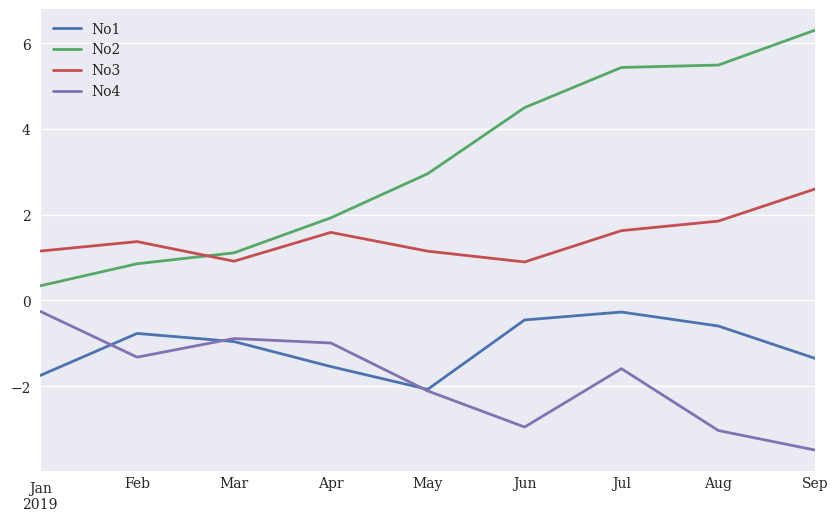

In [43]:
df.cumsum().plot(lw=2.0, figsize=(10, 6)) # 4개 열의 누적합계를 라인 플롯으로 그립니다.

기본적으로 판다스는 `DataFrame` 객체를 그리기 위한 `matplotlib`(Chapter 4 참조) 기능을 포함하고 있습니다. 아래 표는 `plot()` 메서드의 매개변수 목록입니다. 표에서 틱(tick)이라는 용어는 눈금을 의미합니다.    

|매개변수|형식|설명|
|---|---|---|
|`x`|레이블/위치, 디폴트 `None`|열 값이 x일 때 사용|
|`y`|레이블/위치, 디폴트 `None`|열 값이 y일 때 사용|
|`subplots`|불리언 값, 디폴트 `False`|서브플롯에 그림|
|`sharex`|불리언 값, 디폴트 `True`|x축 공유|
|`sharey`|불리언 값, 디폴트 `False`|y축 공유|
|`use_index`|불리언 값, 디폴트 `True`|인덱스를 x축의 눈금으로 사용|
|`stacked`|불리언 값, 디폴트 `False`|바 플롯을 누적하여 표시|
|`sort_columns`|불리언 값, 디폴트 `False`|열을 그리기 전에 알파벳 순으로 정렬|
|`title`|문자열, 디폴트 `None`|제목|
|`grid`|불리언 값, 디폴트 `False`|그리드 표시|
|`legend`|불리언 값, 디폴트 `True`|범례 표시|
|`ax`|`matplotlib axis` 객체|플롯에 사용할 `matplotlib axis` 객체|
|`style`|문자열 또는 리스트/사전|각 열의 라인 플롯 스타일|
|`kind`|문자열(예: `line`, `bar`, `barh`, `kde`, `density`)|플롯 유형|
|`logx`|불리언 값, 디폴트 `False`|x축에 로그값 사용|
|`logy`|불리언 값, 디폴트 `True`|y축에 로그값 사용|
|`xticks`|시퀀스, 디폴트 `Index`|x틱|
|`yticks`|시퀀스, 디폴트 `Values`|y틱|
|`xlim`|튜플, 리스트|x축 경계|
|`ylim`|튜플, 리스트|y축 경계|
|`rot`|정수, 디폴트 None|x틱 회전|
|`secondary_y`|불리언 값/시퀀스, 디폴트 `False`|두 번째 y축에 그림|
|`mark_right`|불리언 값, 디폴트 `True`|두 번째 y축 레이블링|
|`colormap`|문자열/`colormap` 객체, 디폴트 `None`|색상 맵|
|`kwds`|키워드|`matplotlib`에 전달할 옵션|  

다른 예로 같은 데이터의 바 플롯을 그릴 수 있습니다.

<Axes: >

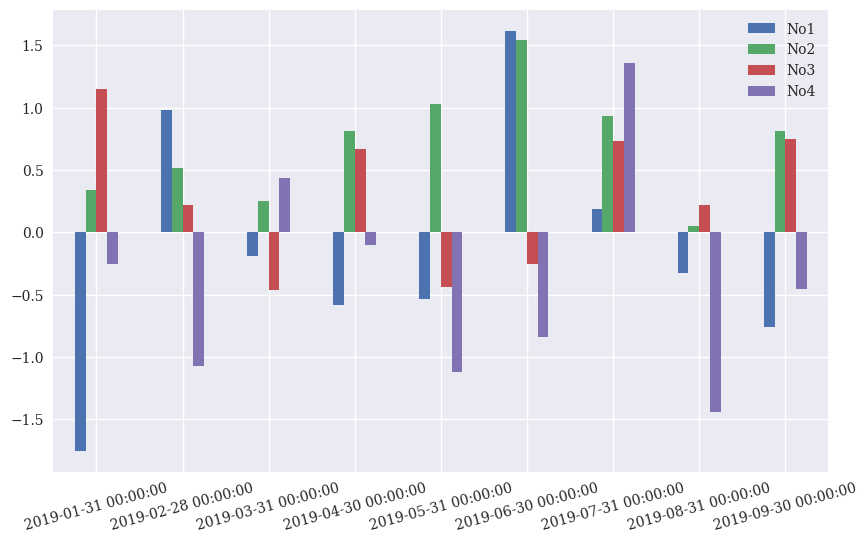

In [44]:
df.plot.bar(figsize=(10, 6), rot=15)
# 또다른 문법 사용 예
# df.plot(kind='bar', figsize=(10, 6))

## 2.4 Series 클래스
지금까지 다룬 `DataFrame` 클래스와 함께, `Series`는 판다스가 제공하는 또다른 중요한 클래스입니다. 엄밀한 의미에서 `Series`는 넘파이에서 다룬 바 있던 배열(array), 그 중에서도 1차원 배열에 속하며, 따라서 동일한 자료형의 데이터만 담을 수 있습니다. 데이터 열(column)이 하나밖에 없는 `DataFrame`으로도 볼 수 있으며, 실제로도 `DataFrame`의 기능 중 상당수를 공유하지만 그렇다고 모든 기능을 가지고 있지는 않습니다. `Series` 객체는 복수의 열이 있는 `DataFrame` 객체에서 하나의 열을 선택하면 얻을 수 있습니다.

In [45]:
type(df)

pandas.core.frame.DataFrame

In [46]:
S = pd.Series(np.linspace(0, 15, 7), name='series')
S

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [47]:
type(S)

pandas.core.series.Series

In [48]:
s = df['No1']

In [49]:
s

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64

In [50]:
type(s)

pandas.core.series.Series

`DataFrame` 객체의 메서드 대부분은(전부는 아니고) `Series` 객체에서도 쓸 수 있습니다.

In [51]:
s.mean()

-0.15021177307319458

<Axes: >

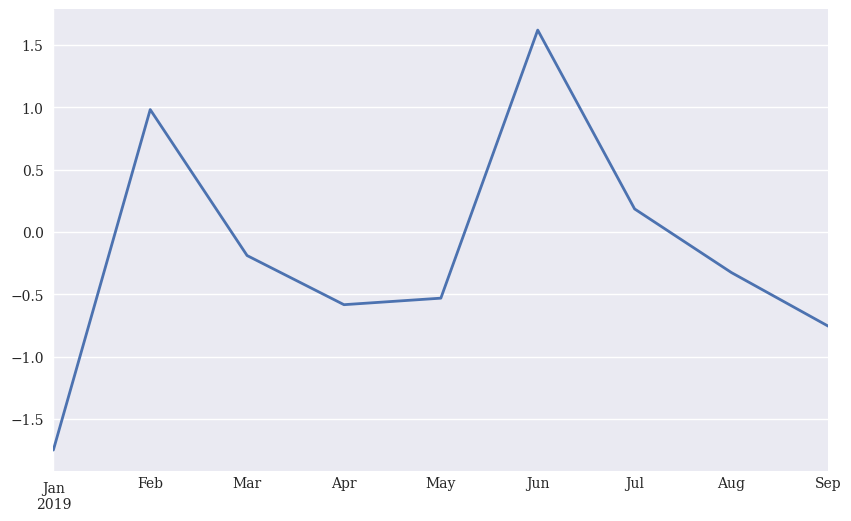

In [52]:
s.plot(lw=2.0, figsize=(10, 6))

## 2.5 그룹화 - GroupBy 연산
판다스는 강력하고 유연한 그룹화 기능을 가지고 있습니다. 이 기능은 SQL의 그룹화 기능(`GROUP BY`)이나 엑셀의 피벗 테이블 기능과 유사합니다.

In [53]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [54]:
groups = df.groupby('Quarter') # Quarter 열을 기준으로 그룹화

In [55]:
groups.size() # 그룹별 데이터 수

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [56]:
groups.mean() # 그룹별 평균

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [57]:
groups.max() # 그룹별 최대값

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [58]:
# 여러 데이터를 함께 출력
# 여기서는 최소값과 최대값을 반올림해서 출력합니다.
groups.aggregate([min, max]).round(2)

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

여러 개의 열을 그룹화할 수도 있습니다. 날짜 인덱스가 있는 달이 짝수인지 홀수인지 나타내는 열을 추가해봅시다.

In [59]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [60]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [61]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [62]:
groups[['No1', 'No4']].aggregate([sum, np.mean])

No1                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      Even      0.981321  0.981321 -1.070043 -1.070043
        Odd      -1.939261 -0.969631  0.182727  0.091364
Q2      Even      1.035387  0.517693 -0.946847 -0.473423
        Odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      Even     -0.326238 -0.326238 -1.443217 -1.443217
        Odd      -0.571834 -0.285917  0.905609  0.452805

## 2.6 고급 선택법
열 값에 조건을 정하거나 이러한 조건들을 논리적으로 결합하여 데이털르 선택하는 경우가 많습니다. 다음 예제를 보죠.

In [63]:
data = np.random.standard_normal((10, 2))

In [64]:
df = pd.DataFrame(data, columns=['x', 'y'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [66]:
df.head() # 첫 다섯 줄 출력

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [67]:
df.tail() # 마지막 다섯 줄 출력

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


다음 코드는 파이썬의 비교 연산과 논리 연산을 두 열에 적용하는 예입니다. 넘파이에서 다뤘던 불리언 배열과 유사합니다.

In [68]:
df['x'] > 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [69]:
(df['x'] > 0) &  (df['y'] < 0)

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [70]:
(df['x'] > 0) | (df['y'] < 0)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

결과로 나오는 불리언 값 `Series` 객체를 사용하면 더 복잡한 데이터(행) 선택이 가능합니다. `query()` 메서드를 사용하여 조건을 문자열로 넣을 수도 있습니다.

In [71]:
df[df['x'] > 0]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [72]:
df.query('x > 0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [73]:
df[(df['x'] > 0) & (df['y'] < 0)]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [74]:
df.query('x > 0  & y < 0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [76]:
df[(df.x > 0) | (df.y < 0)]

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


`DataFrame` 객체에 직접 비교 연산자를 사용할 수도 있습니다.

In [77]:
df > 0

,x,y
0,True,False
1,False,False
2,False,False
3,True,False
4,True,False
5,False,True
6,False,True
7,False,False
8,False,False
9,True,True


In [78]:
df[df > 0] # 양수값을 선택하고 다른 값은 NaN으로 대체

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


## 2.7 병합, 조인, 머지
이번에는 두 개의 `DataFrame` 객체 데이터를 조합하는 여러 가지 방법을 살펴봅니다. 데이터는 다음과 같습니다.

In [79]:
df1 = pd.DataFrame(['100', '200', '300', '400'],
                   index=['a', 'b', 'c', 'd'],
                   columns=['A',])
df1

,A
a,100
b,200
c,300
d,400


In [80]:
df2 = pd.DataFrame(['200', '150', '50'],
                   index=['f', 'b', 'd'],
                   columns=['B',])
df2

,B
f,200
b,150
d,50


### 2.7.1 병합
**병합**은 한 `DataFrame`과 다른 `DataFrame`의 행을 합치는 것을 말합니다. `append()` 메서드나 `pd.concat()` 함수를 사용합니다. 인덱스가 어떻게 사용되는지에 주목하세요.  
> 판다스 버전에 따라 `append()` 메서드를 사용할 때 FutureWarning이 발생하는 것을 볼 수 있습니다. 향후 최신 버전에서 `append()` 메서드를 삭제할 예정이라고 미리 알려주는 것인데, 일부 최신 버전 또는 그 이후의 버전에는 이 기능이 아예 빠져 있을 수 있습니다. 이럴 때는 판다스의 버전을 낮춰서 다시 설치한 후 진행하세요.

In [81]:
df1.append(df2, sort=False)

C:\Users\tjk\AppData\Local\Temp\ipykernel_4376\50354407.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, sort=False)


,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [82]:
df1.append(df2, ignore_index=True, sort=False)

C:\Users\tjk\AppData\Local\Temp\ipykernel_4376\2226406127.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True, sort=False)


,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [83]:
pd.concat((df1, df2), sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [84]:
pd.concat((df1, df2), ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


### 2.7.2 조인
두 데이터를 **조인**할 때는 `DataFrame` 객체의 순서가 영향을 미칩니다. 디폴트로 첫 번째 `DataFrame` 객체의 인덱스가 사용됩니다. 이러한 연산을 좌측 조인(left join)이라고 합니다.

In [85]:
df1.join(df2) # df1의 인덱스가 영향을 미칩니다.

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [86]:
df2.join(df1) # df2의 인덱스가 영향을 미칩니다.

,B,A
f,200,NaN
b,150,200
d,50,400


총 4가지의 조인 방법이 있으며 각 방법마다 인덱스가 데이터에 미치는 영향이 다릅니다.

In [87]:
df1.join(df2, how='left') # 좌측 조인, 디폴트

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [88]:
df1.join(df2, how='right') # 우측 조인, df2.join(df1)과 동일

,A,B
f,NaN,200
b,200,150
d,400,50


In [89]:
df1.join(df2, how='inner') # 내부 조인, 두 인덱스에 모두 있는 값만 사용

,A,B
b,200,150
d,400,50


In [90]:
df1.join(df2, how='outer') # 외부 조인, 두 인덱스에 있는 모든 값을 사용

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


데이터가 없는 `DataFrame` 객체도 조인 연산이 가능합니다. 이 경우에는 좌측 조인과 비슷하게 열이 순차적으로 생성됩니다.

In [91]:
df = pd.DataFrame()
df['A'] = df1 # df1을 A열로 생성
df

,A
a,100
b,200
c,300
d,400


In [92]:
df['B'] = df2 # df2을 B열로 생성
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


딕셔너리를 사용하여 데이터를 합칠 경우, 외부 조인과 비슷하게 모든 열이 동시에 생성됩니다.

In [93]:
df = pd.DataFrame({'A': df1['A'], 'B': df2['B']})
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


### 2.7.3 머지
조인 연산은 `DataFrame` 객체의 인덱스를 기반으로 하지만, 머지(merge) 연산은 두 데이터가 공유하는 열을 기반으로 합니다. 예를 들기 위해 `DataFrame` 객체에 새로운 열 C를 추가해봅시다.

In [94]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

In [95]:
df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [96]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


자동으로 공통 열 C에 대해 머지 연산이 실행됩니다. 외부 머지(outer merge)와 같은 다른 연산도 가능합니다.

In [97]:
pd.merge(df1, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [98]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [99]:
pd.merge(df1, df2, how='outer') # 모든 데이터를 출력하는 외부 머지도 가능

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


다음 코드에서 보듯이 여러 가지 머지 연산도 가능합니다.

In [100]:
pd.merge(df1, df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [101]:
pd.merge(df1, df2, left_on='A', right_on='B', how='outer')

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [102]:
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


## 2.8 성능 측면
앞에서 살펴본 예제를 통해 판다스를 사용하면 같은 목적을 달성할 수 있는 여러 가지 방법이 있음을 알 수 있었습니다. 이 절에서는 두 열의 덧셈을 수행하는 여러 가지 방법의 성능을 비교합니다. 우선 넘파이로 데이터를 생성합니다.

In [103]:
data = np.random.standard_normal((1000000, 2))

In [104]:
data.nbytes

16000000

In [105]:
df = pd.DataFrame(data, columns=['x', 'y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [106]:
%time res = df['x'] + df['y'] # 열(Series 객체)을 더하는 것이 가장 빠릅니다.

CPU times: total: 15.6 ms
Wall time: 11.5 ms


In [107]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [108]:
%time res = df.sum(axis=1)

CPU times: total: 46.9 ms
Wall time: 39.7 ms


In [110]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [111]:
%time res = df.values.sum(axis=1)

CPU times: total: 31.2 ms
Wall time: 18 ms


In [112]:
res[:3]

array([ 0.3872424 , -0.96934273, -0.86315944])

In [113]:
%time res = np.sum(df, axis=1)

CPU times: total: 46.9 ms
Wall time: 43 ms


In [114]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [115]:
%time res = np.sum(df.values, axis=1)

CPU times: total: 31.2 ms
Wall time: 15.1 ms


In [116]:
res[:3]

array([ 0.3872424 , -0.96934273, -0.86315944])

마지막으로 `eval()` 함수와 `apply()` 함수를 사용한 방법도 테스트해봅시다. 판다스의 `eval()` 함수는 파이썬 내장 함수 중 같은 이름을 갖는 `eval()`과 유사하게 문자열 형태로 주어진 연산을 수행하게 해줍니다. `apply()`는 미리 정의해 둔 함수를 데이터프레임에 적용할 때 사용하는 함수이지만, 보통은 아래에 있는 예제와 같이 괄호 안에서 람다 함수를 정의해서 쓰게 됩니다.

In [117]:
%time res = df.eval('x + y') # 열 레이블을 바로 사용 가능

CPU times: total: 15.6 ms
Wall time: 26 ms


In [118]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [119]:
%time res = df.apply(lambda row: row['x'] + row['y'], axis=1) # 반복문과 같이 파이썬 레벨에서 한 행씩 적용하므로 가장 느림

CPU times: total: 11.3 s
Wall time: 12 s


In [120]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64